In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")
%shell cp /content/drive/MyDrive/Pymol/pymol-edu-license-2023.lic .
os.rename("/content/pymol-edu-license-2023.lic", "license.lic")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://sourceforge.net/projects/smina/files/smina.static/download -O smina.static

--2023-08-24 18:37:10--  https://sourceforge.net/projects/smina/files/smina.static/download
Resolving sourceforge.net (sourceforge.net)... 104.18.11.128, 104.18.10.128, 2606:4700::6812:a80, ...
Connecting to sourceforge.net (sourceforge.net)|104.18.11.128|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloads.sourceforge.net/project/smina/smina.static?ts=gAAAAABk56NWwDZapQZZFBiJU4QLZXdZoOXiK00Oj7EDdud2yK_PB0dQAkb8gfstTMKLytIg77IYqymtyIS0gRTWlZSIJab9ww%3D%3D&use_mirror=cytranet&r= [following]
--2023-08-24 18:37:10--  https://downloads.sourceforge.net/project/smina/smina.static?ts=gAAAAABk56NWwDZapQZZFBiJU4QLZXdZoOXiK00Oj7EDdud2yK_PB0dQAkb8gfstTMKLytIg77IYqymtyIS0gRTWlZSIJab9ww%3D%3D&use_mirror=cytranet&r=
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Connecting to downloads.sourceforge.net (downloads.sourceforge.net)|204.68.111.105|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: 

In [ ]:
!python --version

Python 3.10.12


In [ ]:
from IPython.utils import io
import tqdm.notebook
import os
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
  with io.capture_output() as captured:
    !pip install -q condacolab
    import condacolab
    condacolab.install()
    pbar.update(10)

    import sys
    sys.path.append('/usr/local/lib/python3.7/site-packages/')
    pbar.update(10)

    %shell mamba install -c schrodinger pymol-bundle --yes
    pbar.update(10)
    %shell mamba install -c conda-forge mols2grid --yes
    pbar.update(10)
    %shell mamba install rdkit --yes
    pbar.update(10)
    %shell mamba install py3Dmol --yes
    pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
import rdkit
from rdkit import Chem

import py3Dmol
import mols2grid

import numpy as np
import pandas as pd

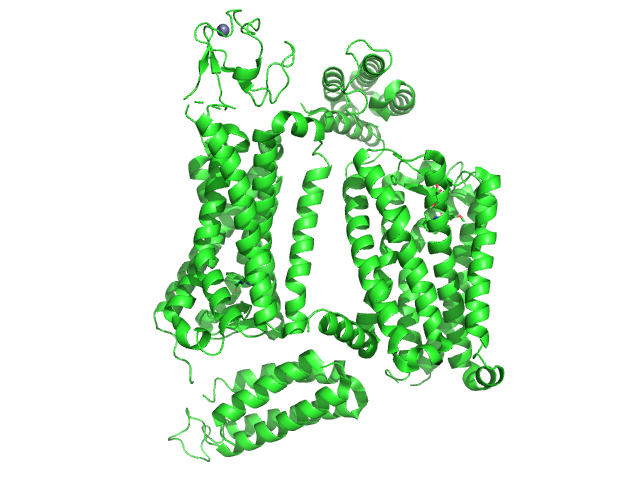

In [ ]:
from pymol import cmd
from IPython.display import Image
cmd.reinitialize()
cmd.fetch("6ME7")
cmd.orient("6ME7")
cmd.rotate("z", "270")
cmd.png("image.png")
Image(filename = "image.png", unconfined = True)

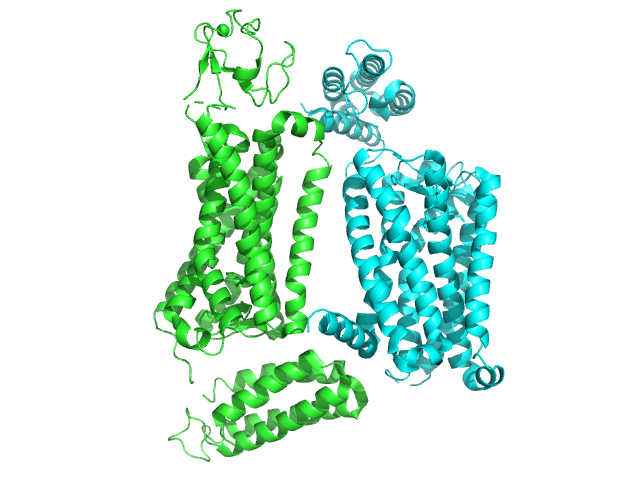

In [ ]:
cmd.util.cbc()
cmd.png("image.png")
Image(filename = "image.png", unconfined=True)

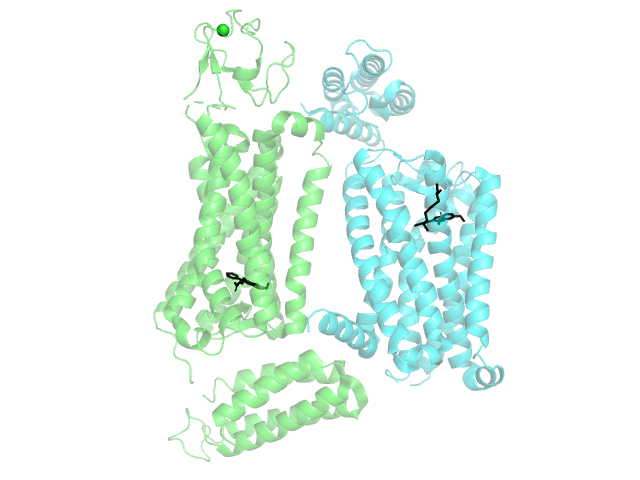

In [ ]:
cmd.color("black", "organic")
cmd.set("cartoon_transparency", 0.5)
cmd.png("image.png")
Image(filename = "image.png", unconfined = True)

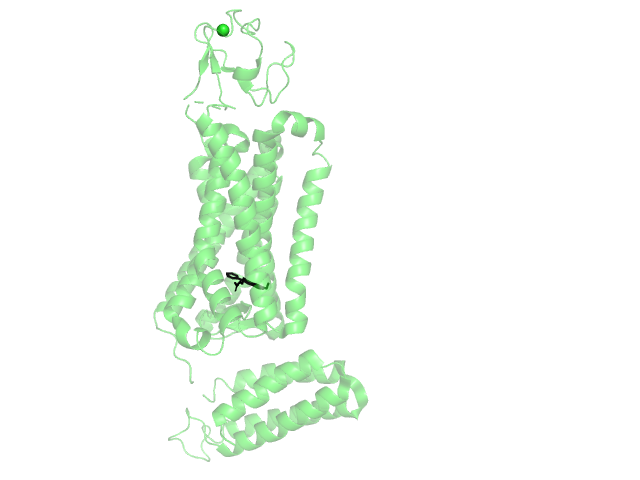

In [ ]:
cmd.remove("chain B")
cmd.png("image.png")
Image(filename = "image.png", unconfined = True)

In [ ]:
cmd.select("6ME7-ligand", "resn JEY")
cmd.select("6ME7-receptor", "6ME7 and not 6ME7-ligand")
cmd.save("6ME7-ligand.pdb", "6ME7-ligand")
cmd.save("6ME7-receptor.pdb", "6ME7-receptor")

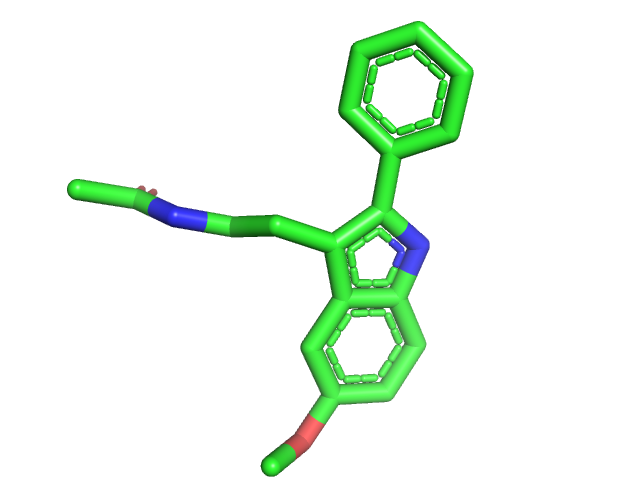

In [ ]:
cmd.reinitialize()
cmd.load("6ME7-ligand.pdb")
cmd.png("ligand.png")
Image(filename = "ligand.png", unconfined=True)

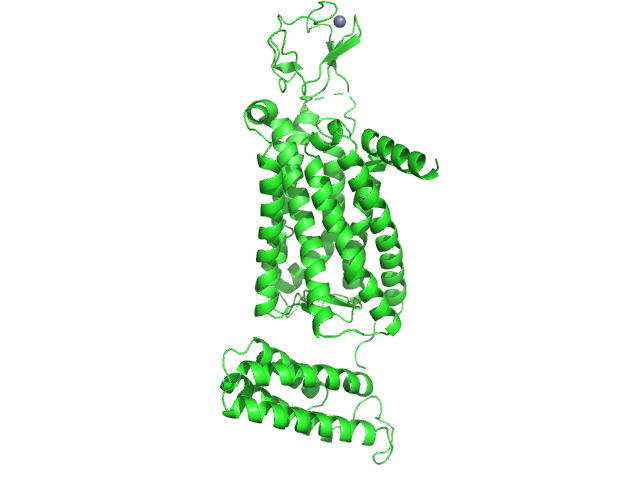

In [ ]:
cmd.reinitialize()
cmd.load("6ME7-receptor.pdb")
cmd.orient("6ME7-receptor")
cmd.rotate("z", "270")
cmd.png("receptor.png")
Image(filename = "receptor.png", unconfined=True)

In [ ]:
!chmod u+x smina.static
!./smina.static

Missing receptor.

Correct usage:

Input:
  -r [ --receptor ] arg         rigid part of the receptor (PDBQT)
  --flex arg                    flexible side chains, if any (PDBQT)
  -l [ --ligand ] arg           ligand(s)
  --flexres arg                 flexible side chains specified by comma 
                                separated list of chain:resid or 
                                chain:resid:icode
  --flexdist_ligand arg         Ligand to use for flexdist
  --flexdist arg                set all side chains within specified distance 
                                to flexdist_ligand to flexible

Search space (required):
  --center_x arg                X coordinate of the center
  --center_y arg                Y coordinate of the center
  --center_z arg                Z coordinate of the center
  --size_x arg                  size in the X dimension (Angstroms)
  --size_y arg                  size in the Y dimension (Angstroms)
  --size_z arg                  size in the Z dimen

Figure(120x120)


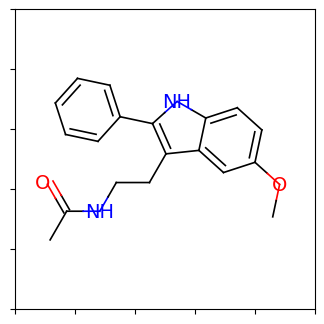

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

size=(120,120)

lig = Chem.MolFromSmiles("CC(=O)NCCc1c2cc(ccc2[nH]c1c3ccccc3)OC")
print(Draw.MolToMPL(lig, size=size))


Figure(120x120)


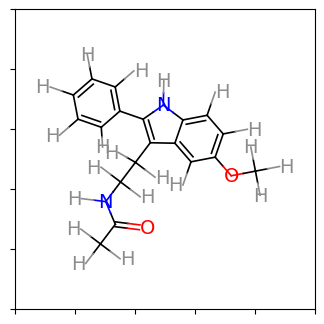

In [ ]:
lig = Chem.AddHs(lig, addCoords=True)
print(Draw.MolToMPL(lig, size=size))

In [ ]:
import py3Dmol
from rdkit.Chem import AllChem
AllChem.EmbedMolecule(lig)
AllChem.MMFFOptimizeMolecule(lig)

mblock = Chem.MolToMolBlock(lig)

view = py3Dmol.view(data=mblock, style={"stick": {}, "sphere": {"scale": 0.3}})
view.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
file = Chem.SDWriter('newligand.sdf')
file.write(lig)

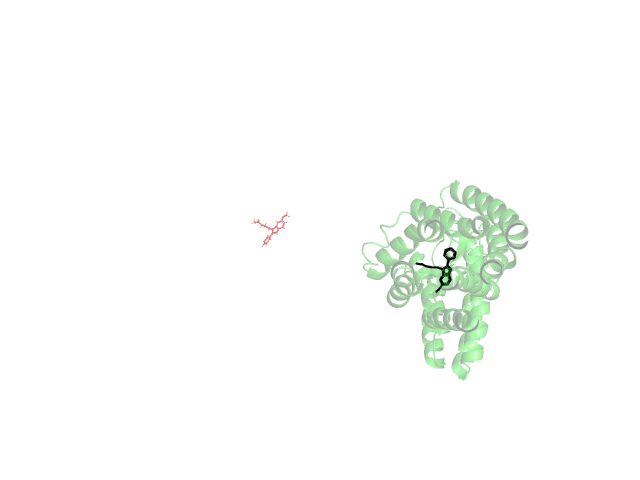

In [ ]:
cmd.reinitialize()
cmd.load("6ME7-receptor.pdb")
cmd.load("6ME7-ligand.pdb")
cmd.color("black", "6ME7-ligand")
cmd.load("newligand.sdf")
cmd.color("red", "newligand")
cmd.set("cartoon_transparency", 0.6)
cmd.select("ligands", "organic")
cmd.zoom("ligands")

cmd.png("receptor.png")
Image(filename = "receptor.png", unconfined=True)


In [ ]:
!./smina.static -r 6ME7-receptor.pdb -l newligand.sdf --autobox_ligand 6ME7-ligand.pdb -o 6ME7-ligand-poses.sdf


*** Open Babel Warning  in Init
  Unable to open data file 'space-groups.txt'
*** Open Babel Warning  in Init
  Cannot initialize database 'space-groups.txt' which may cause further errors.
   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1.923        num_tors_div

Using random seed: 2010955000

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|-

In [ ]:
from rdkit.Chem import PandasTools

dockedposes = PandasTools.LoadSDF("6ME7-ligand-poses.sdf")

,minimizedAffinity,ID,ROMol
0,-10.29640,,
1,-9.49329,,
2,-8.67748,,
3,-8.29291,,
4,-7.87799,,
5,-7.59596,,
6,-7.49988,,

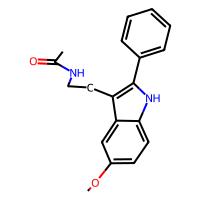
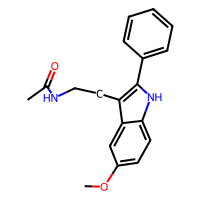
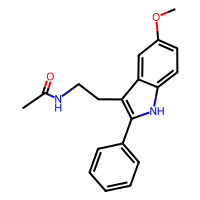
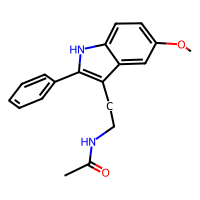
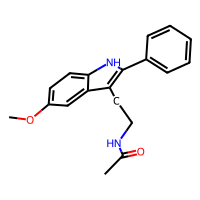
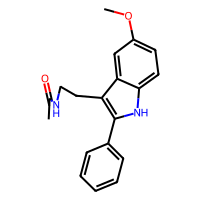
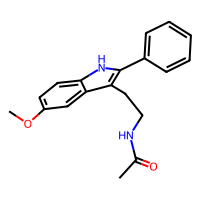

In [ ]:
dockedposes

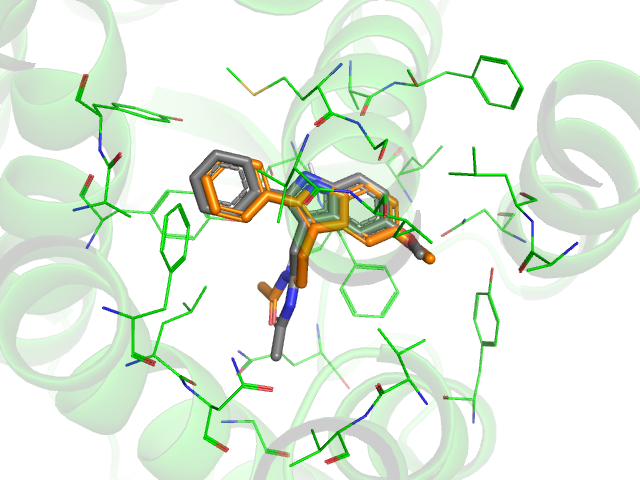

In [ ]:
cmd.reinitialize()
cmd.load("6ME7-receptor.pdb")
cmd.load("6ME7-ligand.pdb")
cmd.load("6ME7-ligand-poses.sdf")

cmd.color("green", "6ME7-receptor")
cmd.color("grey", "6ME7-ligand")
cmd.color("orange", "6ME7-ligand-poses")

cmd.select("pocketresidues", "byres (all within 5 of 6ME7-ligand)&polymer.protein")
cmd.show("line", "pocketresidues")
cmd.set("ray_shadow",0)
cmd.set("cartoon_transparency", 0.8)
cmd.util.cnc()
cmd.zoom("pocketres")
cmd.rotate("z", "90")

camera = cmd.get_view()

camera = cmd.get_view()
cmd.png("pose.png")
Image(filename = "pose.png", unconfined=True)

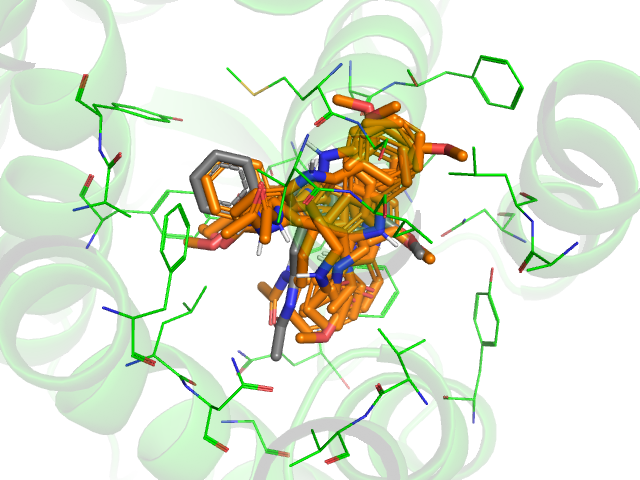

In [ ]:
cmd.set("all_states", 1)
cmd.set_view(camera)
cmd.png("pose.png")
Image(filename = "pose.png", unconfined=True)

In [ ]:
cmd.set("all_states", 0)
cmd.split_states("6ME7-ligand-poses")
cmd.get_names()

['6ME7-receptor',
 '6ME7-ligand',
 '6ME7-ligand-poses',
 '6ME7-ligand-poses_0001',
 '6ME7-ligand-poses_0002',
 '6ME7-ligand-poses_0003',
 '6ME7-ligand-poses_0004',
 '6ME7-ligand-poses_0005',
 '6ME7-ligand-poses_0006',
 '6ME7-ligand-poses_0007']

In [ ]:
cmd.get_names()[-1]

'6ME7-ligand-poses_0007'

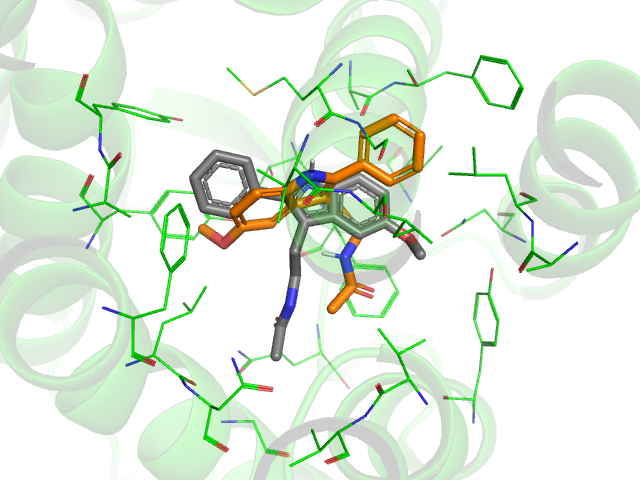

In [ ]:
cmd.hide("everything", "6ME7-ligand-poses*")
worst = cmd.get_names()[-1]
cmd.show("stick", worst)

cmd.set_view(camera)

cmd.png("pose.png")
Image(filename = "pose.png", unconfined=True)

In [ ]:
import pandas as pd
alkdata = pd.read_csv("/content/drive/MyDrive/Sample_Data/ChEMBL_ALKReceptor_Activities.csv",on_bad_lines='skip', sep=';')
alkdata.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL2037224,NaN,NaN,503.48,2,6.91,20,O=C(Nc1cccc(Nc2ccc3c(c2)NC(=O)/C3=C\c2ccc[nH]2...,IC50,'=',...,Mus musculus,SINGLE PROTEIN,CHEMBL2034853,1,Scientific Literature,ACS Med Chem Lett,2012,CHEMBL3307634,NaN,NaN
1,CHEMBL2037209,NaN,NaN,568.56,2,7.02,5,Cc1cn(-c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,IC50,'=',...,Mus musculus,SINGLE PROTEIN,CHEMBL2034853,1,Scientific Literature,ACS Med Chem Lett,2012,CHEMBL3307634,NaN,NaN
2,CHEMBL509032,TAE-684,NaN,614.22,2,5.02,"12, NVP-TAE684",COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,IC50,'<',...,Mus musculus,SINGLE PROTEIN,CHEMBL1156430,1,Scientific Literature,Proc Natl Acad Sci U S A,2007,NaN,NaN,NaN
3,CHEMBL2037226,NaN,NaN,535.50,2,7.36,"22, GNF-5837",Cc1ccc(NC(=O)Nc2cc(C(F)(F)F)ccc2F)cc1Nc1ccc2c(...,IC50,'=',...,Mus musculus,SINGLE PROTEIN,CHEMBL2034853,1,Scientific Literature,ACS Med Chem Lett,2012,CHEMBL3307634,NaN,NaN
4,CHEMBL3128069,NaN,NaN,470.53,0,3.16,35,Cc1nc([C@](C)(O)CO)sc1-c1cnc(N)c(O[C@H](C)c2cc...,IC50,'=',...,Mus musculus,SINGLE PROTEIN,CHEMBL4376817,1,Scientific Literature,J Med Chem,2019,NaN,NaN,NaN


In [ ]:
for col in alkdata.columns:
  print(col)


Molecule ChEMBL ID
Molecule Name
Molecule Max Phase
Molecular Weight
#RO5 Violations
AlogP
Compound Key
Smiles
Standard Type
Standard Relation
Standard Value
Standard Units
pChEMBL Value
Data Validity Comment
Comment
Uo Units
Ligand Efficiency BEI
Ligand Efficiency LE
Ligand Efficiency LLE
Ligand Efficiency SEI
Potential Duplicate
Assay ChEMBL ID
Assay Description
Assay Type
BAO Format ID
BAO Label
Assay Organism
Assay Tissue ChEMBL ID
Assay Tissue Name
Assay Cell Type
Assay Subcellular Fraction
Assay Parameters
Assay Variant Accession
Assay Variant Mutation
Target ChEMBL ID
Target Name
Target Organism
Target Type
Document ChEMBL ID
Source ID
Source Description
Document Journal
Document Year
Cell ChEMBL ID
Properties
Action Type


In [ ]:
from matplotlib.patches import SimpleNamespace
from pandas.core.internals.blocks import setitem_datetimelike_compat
actives=pd.DataFrame(alkdata.loc[alkdata['pChEMBL Value'] > 8]['Smiles'])
cognate=pd.DataFrame({"Smiles":["CC(=O)NCCc1c2cc(ccc2[nH]c1c3ccccc3)OC"]})

actives=pd.concat([actives,cognate])

from rdkit import DataStructs

fpgen = AllChem.GetMorganGenerator()
query = Chem.MolFromSmiles('CC(=O)NCCc1c2cc(ccc2[nH]c1c3ccccc3)OC')
queryfp = fpgen.GetFingerprint(query)

sim=[]
for x in actives.Smiles:
  target = Chem.MolFromSmiles(x)
  targetfp = fpgen.GetFingerprint(target)
  s=DataStructs.TanimotoSimilarity(targetfp,queryfp)
  sim.append(s)

actives = pd.DataFrame(actives)
actives["Active"]="True"
actives["Sim"]=sim
actives = actives.rename(columns = {'Smiles':'smiles'})
actives=actives.sort_values("Sim",ascending=False)
actives=actives.drop_duplicates(subset='smiles', keep="first")
actives

,smiles,Active,Sim
0,CC(=O)NCCc1c2cc(ccc2[nH]c1c3ccccc3)OC,True,1.000000
4,Cc1nc([C@](C)(O)CO)sc1-c1cnc(N)c(O[C@H](C)c2cc...,True,0.072464
9,Cc1nn(C)c2c1Cc1cnc(N)c(c1)O[C@H](C)c1cc(F)ccc1...,True,0.051471
7,C[C@H]1Oc2cc(cnc2N)Cc2c(nn(C)c2C#N)CN(C)C(=O)c...,True,0.050000


In [ ]:
!wget http://files.docking.org/2D/CD/CDAC.smi -O sample_one.smi
!wget http://files.docking.org/2D/EF/EFEA.smi -O sample_two.smi
!wget http://files.docking.org/2D/HJ/HJAB.smi -O sample_three.smi

--2023-08-24 23:38:08--  http://files.docking.org/2D/CD/CDAC.smi
Resolving files.docking.org (files.docking.org)... 169.230.75.3
Connecting to files.docking.org (files.docking.org)|169.230.75.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164703 (161K) [application/smil+xml]
Saving to: ‘sample_one.smi’

sample_one.smi      100%[===================>] 160.84K  --.-KB/s    in 0.1s    

2023-08-24 23:38:09 (1.05 MB/s) - ‘sample_one.smi’ saved [164703/164703]

--2023-08-24 23:38:09--  http://files.docking.org/2D/EF/EFEA.smi
Resolving files.docking.org (files.docking.org)... 169.230.75.3
Connecting to files.docking.org (files.docking.org)|169.230.75.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 474635 (464K) [application/smil+xml]
Saving to: ‘sample_two.smi’

sample_two.smi      100%[===================>] 463.51K  1.84MB/s    in 0.2s    

2023-08-24 23:38:10 (1.84 MB/s) - ‘sample_two.smi’ saved [474635/474635]

--2023-08-24 23:38:10-- 

In [ ]:
frames = [pd.read_csv('sample_one.smi', sep=" "),
         pd.read_csv('sample_two.smi', sep=" "),
         pd.read_csv('sample_three.smi', sep=" ")]
randoms = pd.concat(frames,ignore_index=True)


In [ ]:
randoms

,smiles,zinc_id
0,O=C(NCCN1CCC(O)CC1)OCc1ccccc1,306320515
1,CC(C)(C)OC(=O)N1CCC2(CC1)C[C@@H](N)CCO2,91303585
2,O=C(Cc1ncon1)Nc1ccc(F)c(F)c1F,93298
3,Cc1cc(F)c(B(O)OC(C)(C)C(C)(C)O)cc1C,200317185
4,CCOC(=O)[C@]1(C)Oc2cc(Cl)ccc2NC1=O,26340455
...,...,...
91268,Cc1nc([C@H]2CCN(CC3CCCCC3)C2)nc(C)c1CC(=O)Nc1c...,257287581
91269,CC[C@@H]1CSC2=N[C@@H](c3ccccn3)[C@H](c3cccn3-c...,260780925
91270,CC[C@H](C)OC(=O)CN1C(=O)S/C(=C/c2ccc(-c3ccc(F)...,408600907
91271,Cc1ccc(C)c(NC(=O)CSc2nnc(COc3ccc4c(c3)CCCC4)o2)c1,409008213


In [ ]:
randoms.head()

,smiles,zinc_id
0,O=C(NCCN1CCC(O)CC1)OCc1ccccc1,306320515
1,CC(C)(C)OC(=O)N1CCC2(CC1)C[C@@H](N)CCO2,91303585
2,O=C(Cc1ncon1)Nc1ccc(F)c(F)c1F,93298
3,Cc1cc(F)c(B(O)OC(C)(C)C(C)(C)O)cc1C,200317185
4,CCOC(=O)[C@]1(C)Oc2cc(Cl)ccc2NC1=O,26340455


In [ ]:
randoms=pd.DataFrame(randoms['smiles'])
randoms=randoms.sample(300)

sim=[]
for x in randoms.smiles:
  target = Chem.MolFromSmiles(x)
  targetfp = fpgen.GetFingerprint(target)
  s=DataStructs.TanimotoSimilarity(targetfp,queryfp)
  sim.append(s)

randoms["Active"]="False"
randoms["Sim"]=sim
randoms=randoms.sort_values("Sim", ascending=False)
randoms.head()

,smiles,Active,Sim
35954,CCSC1=NC2(CCN(C(=O)Nc3ccc(OC)cc3)CC2)N=C1c1ccccc1,False,0.218182
90814,Cc1oc2cc(O[C@@H](C)C(=O)NCc3ccccc3)ccc2c(=O)c1...,False,0.209091
74845,CC[C@H](Sc1ccccc1)C(=O)Nc1nnc(-c2ccc(OC)cc2OC)s1,False,0.200000
53274,Cc1cc2cc(CCNC(=O)C3c4ccccc4Oc4ccccc43)c(=O)[nH...,False,0.192661
81671,COc1ccc(CCC(=O)Nc2ccc3c(c2)CCCN3C(=O)c2ccccc2)cc1,False,0.188034


In [ ]:
activesample=actives.sort_values("Sim", ascending=False)[0:3]
print(activesample)

                                              smiles Active       Sim
0              CC(=O)NCCc1c2cc(ccc2[nH]c1c3ccccc3)OC   True  1.000000
4  Cc1nc([C@](C)(O)CO)sc1-c1cnc(N)c(O[C@H](C)c2cc...   True  0.072464
9  Cc1nn(C)c2c1Cc1cnc(N)c(c1)O[C@H](C)c1cc(F)ccc1...   True  0.051471


In [ ]:
import random
import numpy as np
vsmols = pd.concat([activesample, randoms.sample(7)])

number=np.arange(0,len(vsmols)).astype('str')
vsmols["ID"]=np.char.add('Molecule_', number)

In [ ]:
vsmols.head(10)

,smiles,Active,Sim,ID
0,CC(=O)NCCc1c2cc(ccc2[nH]c1c3ccccc3)OC,True,1.000000,Molecule_0
4,Cc1nc([C@](C)(O)CO)sc1-c1cnc(N)c(O[C@H](C)c2cc...,True,0.072464,Molecule_1
9,Cc1nn(C)c2c1Cc1cnc(N)c(c1)O[C@H](C)c1cc(F)ccc1...,True,0.051471,Molecule_2
73229,CSc1ccc(-c2noc(-c3ncn4c3CO[C@H](c3ccc(F)cc3)C4...,False,0.046154,Molecule_3
73213,COc1cc([C@@H]2c3c(-c4ccccc4)n[nH]c3C(=O)N2c2cc...,False,0.172414,Molecule_4
20662,CC(C)(C)[C@H]1CCc2c(sc3c2c(=O)n(-c2ccccc2)c2nn...,False,0.071429,Molecule_5
67405,Cc1ccc(N2C(=O)[C@H]3ON(c4ccc(Cl)cc4)[C@H](c4cc...,False,0.058824,Molecule_6
17686,O=[N+]([O-])/C(C(Cl)=C(Cl)Cl)=C(\SCc1ccccc1)N1...,False,0.113208,Molecule_7
43795,C[C@@H]1CN(Cc2ccc3oc(-c4cccc(Br)c4)nc3c2)C[C@@...,False,0.094017,Molecule_8
23188,Cc1nc(NC(=O)CSc2ncnc3sc4c(c23)CC[C@@H](C)C4)sc1C,False,0.062016,Molecule_9


In [ ]:
def Convert3D(molsmile):
  mol = Chem.MolFromSmiles(molsmile)
  mol = Chem.AddHs(mol, addCoords=True)
  AllChem.EmbedMolecule(mol)
  AllChem.MMFFOptimizeMolecule(mol)
  return mol

In [ ]:
minim=[]
for x in vsmols.smiles:
  minim.append(Convert3D(x))

In [ ]:
vsmols["minim"]=minim

In [ ]:
vsmols.head(10)

,smiles,Active,Sim,ID,minim
0,CC(=O)NCCc1c2cc(ccc2[nH]c1c3ccccc3)OC,True,1.000000,Molecule_0,<rdkit.Chem.rdchem.Mol object at 0x7a144e13d930>
4,Cc1nc([C@](C)(O)CO)sc1-c1cnc(N)c(O[C@H](C)c2cc...,True,0.072464,Molecule_1,<rdkit.Chem.rdchem.Mol object at 0x7a144e13d540>
9,Cc1nn(C)c2c1Cc1cnc(N)c(c1)O[C@H](C)c1cc(F)ccc1...,True,0.051471,Molecule_2,<rdkit.Chem.rdchem.Mol object at 0x7a144e13d690>
73229,CSc1ccc(-c2noc(-c3ncn4c3CO[C@H](c3ccc(F)cc3)C4...,False,0.046154,Molecule_3,<rdkit.Chem.rdchem.Mol object at 0x7a144e13d770>
73213,COc1cc([C@@H]2c3c(-c4ccccc4)n[nH]c3C(=O)N2c2cc...,False,0.172414,Molecule_4,<rdkit.Chem.rdchem.Mol object at 0x7a144e13da80>
20662,CC(C)(C)[C@H]1CCc2c(sc3c2c(=O)n(-c2ccccc2)c2nn...,False,0.071429,Molecule_5,<rdkit.Chem.rdchem.Mol object at 0x7a144e13d1c0>
67405,Cc1ccc(N2C(=O)[C@H]3ON(c4ccc(Cl)cc4)[C@H](c4cc...,False,0.058824,Molecule_6,<rdkit.Chem.rdchem.Mol object at 0x7a144e13d230>
17686,O=[N+]([O-])/C(C(Cl)=C(Cl)Cl)=C(\SCc1ccccc1)N1...,False,0.113208,Molecule_7,<rdkit.Chem.rdchem.Mol object at 0x7a144e13d620>
43795,C[C@@H]1CN(Cc2ccc3oc(-c4cccc(Br)c4)nc3c2)C[C@@...,False,0.094017,Molecule_8,<rdkit.Chem.rdchem.Mol object at 0x7a144e13d4d0>
23188,Cc1nc(NC(=O)CSc2ncnc3sc4c(c23)CC[C@@H](C)C4)sc1C,False,0.062016,Molecule_9,<rdkit.Chem.rdchem.Mol object at 0x7a144e13d380>


In [ ]:
PandasTools.WriteSDF(vsmols, out="dockingligands.sdf",
                     molColName='minim',
                     idName='ID',
                     properties=None,
                     allNumeric=False,
                     forceV3000=False)

In [ ]:
!./smina.static -r 6ME7-receptor.pdb -l dockingligands.sdf --autobox_ligand 6ME7-ligand.pdb -o virtualscreen.sdf --exhaustiveness 1 --num_modes 1 -q

*** Open Babel Warning  in Init
  Unable to open data file 'space-groups.txt'
*** Open Babel Warning  in Init
  Cannot initialize database 'space-groups.txt' which may cause further errors.

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Refine time 5.92678

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Refine time 38.6931

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Refine time 3.48132

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Refine time 20.992

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----

In [ ]:
vsresults = PandasTools.LoadSDF("virtualscreen.sdf")

merged=vsmols.merge(vsresults, left_on="ID",right_on="ID")
merged=merged[['ID','Active','Sim','minimizedAffinity']]
merged=merged.sort_values('minimizedAffinity', ascending=True)
merged

,ID,Active,Sim,minimizedAffinity
2,Molecule_2,True,0.051471,-0.18790
6,Molecule_6,False,0.058824,-0.88112
0,Molecule_0,True,1.000000,-10.29845
3,Molecule_3,False,0.046154,-2.50142
1,Molecule_1,True,0.072464,-4.66079
8,Molecule_8,False,0.094017,-5.04236
9,Molecule_9,False,0.062016,-6.77418
7,Molecule_7,False,0.113208,-6.90937
4,Molecule_4,False,0.172414,-9.14506
5,Molecule_5,False,0.071429,0.11239


In [ ]:
merged['minimizedAffinity']=merged['minimizedAffinity'].astype('float64')
merged=merged.sort_values('minimizedAffinity', ascending=True)
merged

,ID,Active,Sim,minimizedAffinity
0,Molecule_0,1,1.000000,-10.29845
4,Molecule_4,0,0.172414,-9.14506
7,Molecule_7,0,0.113208,-6.90937
9,Molecule_9,0,0.062016,-6.77418
8,Molecule_8,0,0.094017,-5.04236
1,Molecule_1,1,0.072464,-4.66079
3,Molecule_3,0,0.046154,-2.50142
6,Molecule_6,0,0.058824,-0.88112
2,Molecule_2,1,0.051471,-0.18790
5,Molecule_5,0,0.071429,0.11239


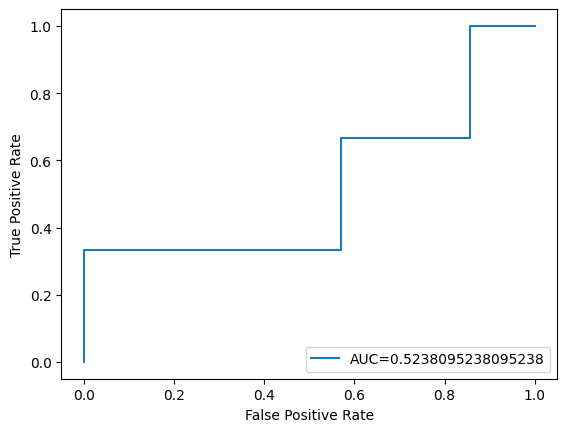

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

merged.replace({"False": 0, "True": 1}, inplace=True)


fpr, tpr, _ = metrics.roc_curve(merged['Active'],  -merged['minimizedAffinity'])

auc = metrics.roc_auc_score(merged['Active'],  -merged['minimizedAffinity'])

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

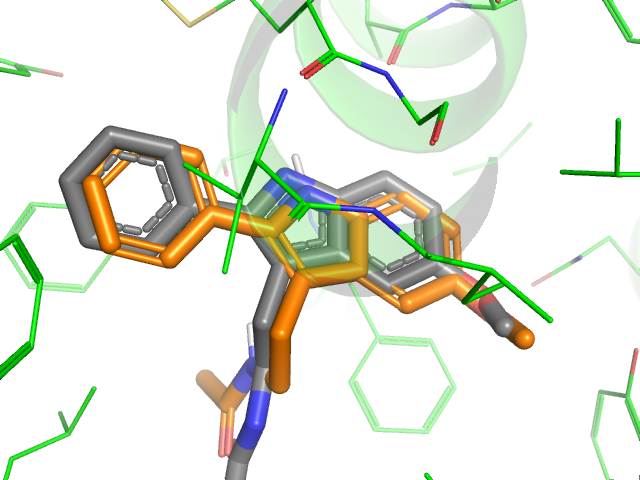

In [ ]:
cmd.reinitialize()
cmd.load("6ME7-receptor.pdb")
cmd.load("6ME7-ligand.pdb")
cmd.load("virtualscreen.sdf")

cmd.color("green", "6ME7-receptor")
cmd.color("grey", "6ME7-ligand")
cmd.color("orange", "virtualscreen")

cmd.select("pocketresidues", "byres (all within 5 of 6ME7-ligand)&polymer.protein")
cmd.show("line", "pocketresidues")
cmd.set("ray_shadow", 0)
cmd.set("cartoon_transparency", 0.8)
cmd.util.cnc()
cmd.zoom("pocketres")
cmd.rotate("z", "90")
camera = cmd.get_view()

cmd.split_states("virtualscreen")
cmd.remove("virtualscreen")
cmd.hide("stick","Molecule_*")
cmd.show("stick","Molecule_0")

cmd.png("pose.png")
Image(filename = "pose.png", unconfined=True)

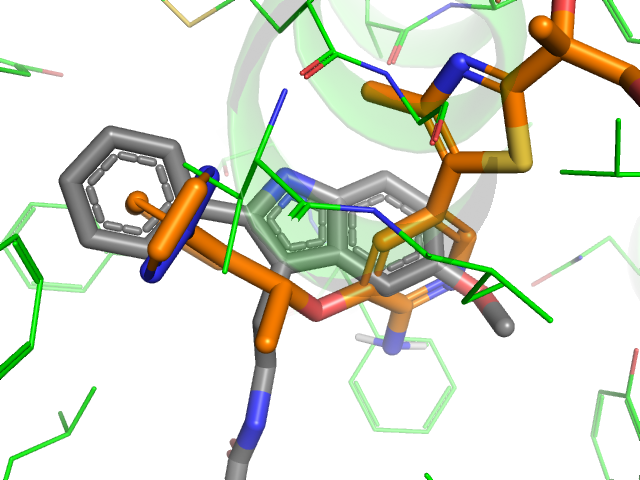

In [ ]:
cmd.hide("stick", "Molecule_*")
cmd.show("stick", "Molecule_1")

cmd.png("pose.png")
Image(filename = "pose.png", unconfined=True)